In [11]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [25]:
dff = "/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/listings_new.csv"
df = pd.read_csv(dff)
df.head()

/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.020000e+13,12/5/21,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,2.020000e+13,12/5/21,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,2.020000e+13,12/5/21,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,2.020000e+13,12/5/21,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,2.020000e+13,12/5/21,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


In [15]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of property type in this listings dataset such as {}... \n".format(len(df.room_type.unique()),
                                                                           ", ".join(df.room_type.unique()[0:5])))

print("There are {} neighbourhood type in this dataset such as {}... \n".format(len(df.neighbourhood_group_cleansed.unique()),
                                                                                      ", ".join(df.neighbourhood_group_cleansed.unique()[0:5])))

There are 38277 observations and 74 features in this dataset. 

There are 4 types of property type in this listings dataset such as Entire home/apt, Private room, Hotel room, Shared room... 

There are 5 neighbourhood type in this dataset such as Manhattan, Brooklyn, Queens, Staten Island, Bronx... 



In [16]:
df[["host_location", "description","review_scores_rating","neighbourhood_group_cleansed"]].head()

,host_location,description,review_scores_rating,neighbourhood_group_cleansed
0,"New York, New York, United States","Beautiful, spacious skylit studio in the heart...",4.70,Manhattan
1,"New York, New York, United States","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4.45,Brooklyn
2,"New York, New York, United States",<b>The space</b><br />HELLO EVERYONE AND THANK...,4.52,Brooklyn
3,"Brooklyn, New York, United States",We welcome you to stay in our lovely 2 br dupl...,5.00,Brooklyn
4,"New York, New York, United States",Please don’t expect the luxury here just a bas...,4.21,Manhattan


In [17]:
# Groupby by location/ neighbourhood
neighbourhood = df.groupby("neighbourhood_group_cleansed")

# Summary statistic of all listings
neighbourhood.describe().head()

id                                       \
                                count          mean           std      min   
neighbourhood_group_cleansed                                                 
Bronx                          1104.0  3.464624e+07  1.547509e+07  44096.0   
Brooklyn                      14716.0  2.761521e+07  1.735597e+07   3831.0   
Manhattan                     16781.0  2.967896e+07  1.782012e+07   2595.0   
Queens                         5323.0  3.371381e+07  1.577773e+07  12937.0   
Staten Island                   353.0  3.320147e+07  1.574636e+07  42882.0   

                                                                               \
                                     25%         50%          75%         max   
neighbourhood_group_cleansed                                                    
Bronx                         22247649.0  38776329.0  48646923.50  53658866.0   
Brooklyn                      11514516.5  26932651.5  44228833.25  53665099.0   
Manhattan                     12542485.0  31120226.0  47037451.00  53663081.0   
Queens                        21260897.0  37219305.0  47870308.50  53655582.0   
Staten Island                 19929723.0  35516587.0  47355990.00  53662542.0   

                             scrape_id                ...  \
                                 count          mean  ...   
neighbourhood_group_cleansed                          ...   
Bronx                           1104.0  2.021120e+13  ...   
Brooklyn                       14716.0  2.021120e+13  ...   
Manhattan                      16781.0  2.021120e+13  ...   
Queens                          5323.0  2.021120e+13  ...   
Staten Island                    353.0  2.021120e+13  ...   

                             calculated_host_listings_count_shared_rooms       \
                                                                     75%  max   
neighbourhood_group_cleansed                                                    
Bronx                                                                0.0  7.0   
Brooklyn                                                             0.0  7.0   
Manhattan                                                            0.0  8.0   
Queens                                                               0.0  7.0   
Staten Island                                                        0.0  1.0   

                             reviews_per_month                            \
                                         count      mean       std   min   
neighbourhood_group_cleansed                                               
Bronx                                    852.0  2.502735  4.501134  0.01   
Brooklyn                               11543.0  1.657035  4.492198  0.01   
Manhattan                              12012.0  1.503178  4.203514  0.01   
Queens                                  4081.0  2.317123  4.538041  0.01   
Staten Island                            285.0  2.621158  5.225308  0.01   

                                                         
                               25%   50%    75%     max  
neighbourhood_group_cleansed                             
Bronx                         0.33  1.02  2.885   41.25  
Brooklyn                      0.11  0.46  1.760  141.00  
Manhattan                     0.10  0.37  1.400  110.88  
Queens                        0.21  0.97  2.500   83.00  
Staten Island                 0.45  1.25  2.540   48.00  

[5 rows x 312 columns]

In [18]:
neighbourhood.mean().sort_values(by="review_scores_rating",ascending=False).head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
neighbourhood_group_cleansed,,,,,,,,,,,,,,,,,,,,,
Staten Island,3.320147e+07,2.021120e+13,1.355557e+08,2.722380,2.722380,40.612946,-74.105641,3.220963,NaN,1.536585,...,4.761690,4.862042,4.875141,4.753310,4.751127,2.798867,1.079320,1.705382,0.014164,2.621158
Brooklyn,2.761521e+07,2.021120e+13,9.297633e+07,19.759026,19.759026,40.682855,-73.949822,2.815983,NaN,1.360483,...,4.627086,4.845133,4.840370,4.720876,4.688019,7.535472,1.374354,6.104716,0.044917,1.657035
Bronx,3.464624e+07,2.021120e+13,1.601797e+08,21.389493,21.389493,40.849640,-73.883405,2.775362,NaN,1.277670,...,4.661406,4.782765,4.794231,4.600334,4.652479,3.622283,1.662138,1.889493,0.069746,2.502735
Queens,3.371381e+07,2.021120e+13,1.542471e+08,20.271702,20.271702,40.728660,-73.866956,2.737554,NaN,1.308211,...,4.619018,4.799348,4.778452,4.714851,4.628613,18.636295,2.026865,16.526019,0.068382,2.317123
Manhattan,2.967896e+07,2.021120e+13,1.180728e+08,86.627499,86.627499,40.764549,-73.975250,2.780526,NaN,1.291148,...,4.588856,4.789799,4.784957,4.801519,4.610573,27.665038,16.364817,11.127704,0.043442,1.503178


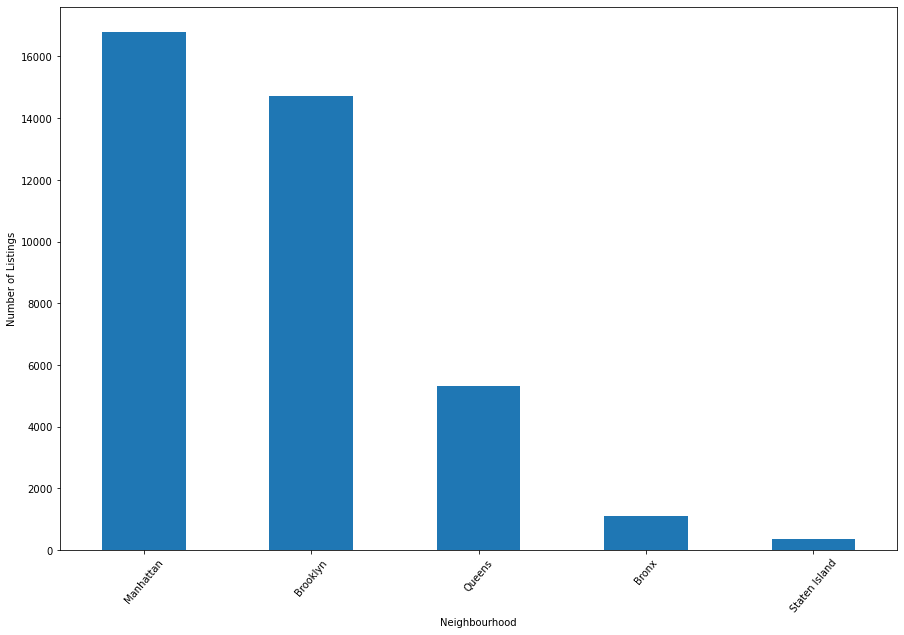

In [19]:
## no. of listings for the locality or neighbourhood
plt.figure(figsize=(15,10))
neighbourhood.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.show()

/var/folders/dj/yhh1tt1s3lj_lgxxf2n3s1xr0000gn/T/ipykernel_3950/2874230936.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  neighbourhood.max().sort_values(by="review_scores_rating",ascending=False)["review_scores_rating"].plot.bar()


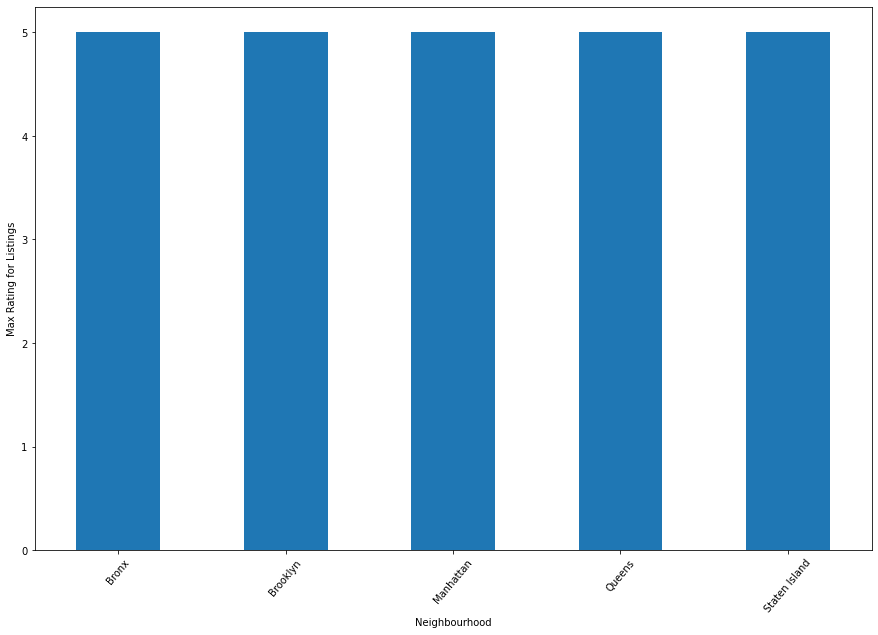

In [20]:
## Max rating for the neighbourhood
plt.figure(figsize=(15,10))
neighbourhood.max().sort_values(by="review_scores_rating",ascending=False)["review_scores_rating"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Neighbourhood")
plt.ylabel("Max Rating for Listings")
plt.show()

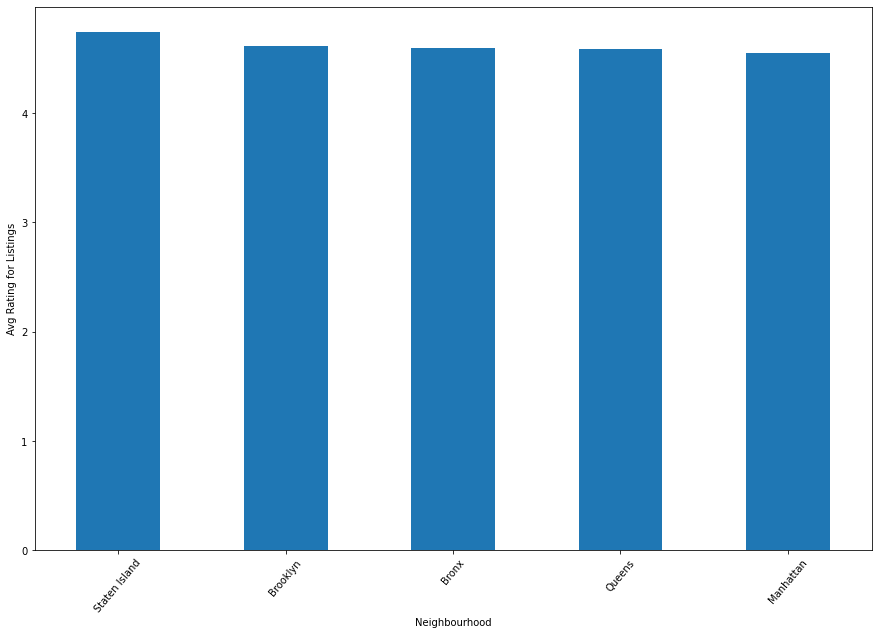

In [22]:
## Avg rating for the property type
plt.figure(figsize=(15,10))
neighbourhood.mean().sort_values(by="review_scores_rating",ascending=False)["review_scores_rating"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Neighbourhood")
plt.ylabel("Avg Rating for Listings")
plt.show()

In [26]:
df.price.head()


0    $150.00 
1     $75.00 
2     $60.00 
3    $275.00 
4     $68.00 
Name: price, dtype: object

In [27]:
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('$','')
df['price'] = pd.to_numeric(df['price'])


/var/folders/dj/yhh1tt1s3lj_lgxxf2n3s1xr0000gn/T/ipykernel_3950/3632401404.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [28]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.020000e+13,12/5/21,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,2.020000e+13,12/5/21,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,2.020000e+13,12/5/21,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,2.020000e+13,12/5/21,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,2.020000e+13,12/5/21,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


In [29]:
# Groupby by room type
property_type = df.groupby("room_type")

# Summary statistic of all listings
property_type.describe().head()

id                                                     \
                   count          mean           std       min          25%   
room_type                                                                     
Entire home/apt  20397.0  2.892364e+07  1.769031e+07    2595.0  12204161.00   
Hotel room         210.0  3.360472e+07  8.443306e+06   77765.0  32326855.00   
Private room     17098.0  3.036174e+07  1.717677e+07    5121.0  14635866.25   
Shared room        572.0  3.097681e+07  1.634313e+07  198028.0  16024597.25   

                                                    scrape_id                \
                        50%         75%         max     count          mean   
room_type                                                                     
Entire home/apt  30182137.0  46091331.0  53665099.0   20397.0  2.020000e+13   
Hotel room       34478345.5  38569228.0  51326519.0     210.0  2.020000e+13   
Private room     31564828.5  47023305.0  53663081.0   17098.0  2.020000e+13   
Shared room      34787168.0  43867022.0  53641651.0     572.0  2.020000e+13   

                 ... calculated_host_listings_count_shared_rooms       \
                 ...                                         75%  max   
room_type        ...                                                    
Entire home/apt  ...                                        0.00  6.0   
Hotel room       ...                                        0.00  0.0   
Private room     ...                                        0.00  7.0   
Shared room      ...                                        3.25  8.0   

                reviews_per_month                                         \
                            count      mean       std   min   25%    50%   
room_type                                                                  
Entire home/apt           15932.0  1.710448  4.316056  0.01  0.13  0.490   
Hotel room                  162.0  3.663457  9.838729  0.02  0.14  0.635   
Private room              12285.0  1.718292  4.428807  0.01  0.10  0.470   
Shared room                 394.0  1.434848  2.781745  0.01  0.10  0.470   

                                 
                    75%     max  
room_type                        
Entire home/apt  1.8300  141.00  
Hotel room       1.9975   86.24  
Private room     1.7300  110.88  
Shared room      1.7475   32.00  

[4 rows x 320 columns]

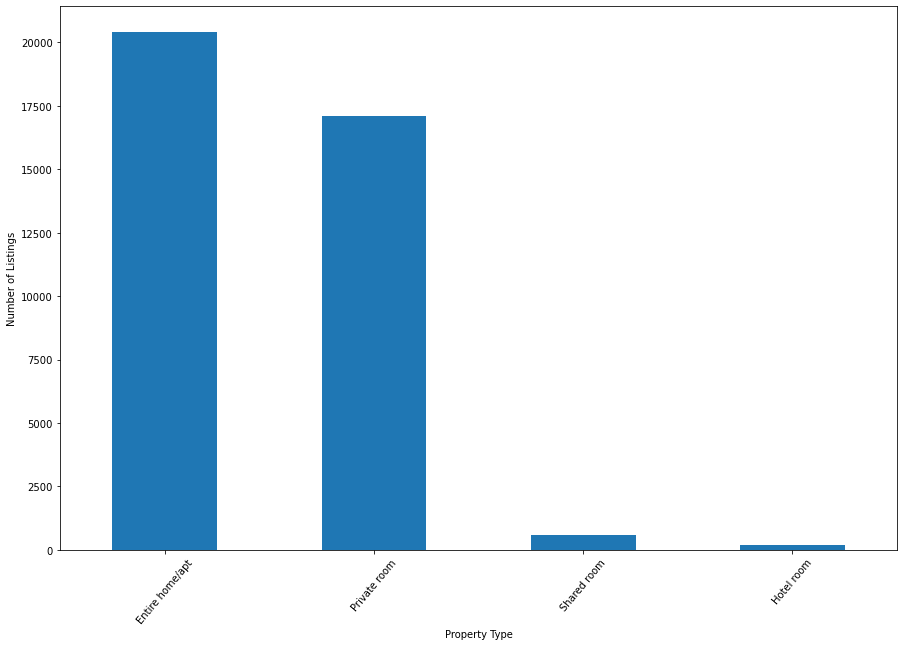

In [30]:
plt.figure(figsize=(15,10))
property_type.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.show()

/var/folders/dj/yhh1tt1s3lj_lgxxf2n3s1xr0000gn/T/ipykernel_3950/521138536.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  property_type.max().sort_values(by="review_scores_rating",ascending=False)["review_scores_rating"].plot.bar()


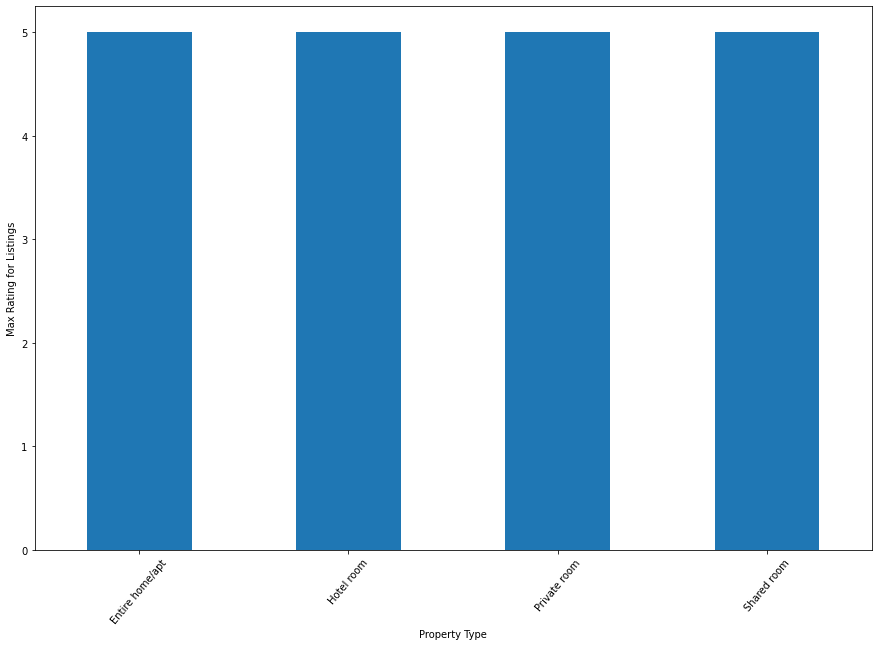

In [31]:
## Max rating for the property type
plt.figure(figsize=(15,10))
property_type.max().sort_values(by="review_scores_rating",ascending=False)["review_scores_rating"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Property Type")
plt.ylabel("Max Rating for Listings")
plt.show()

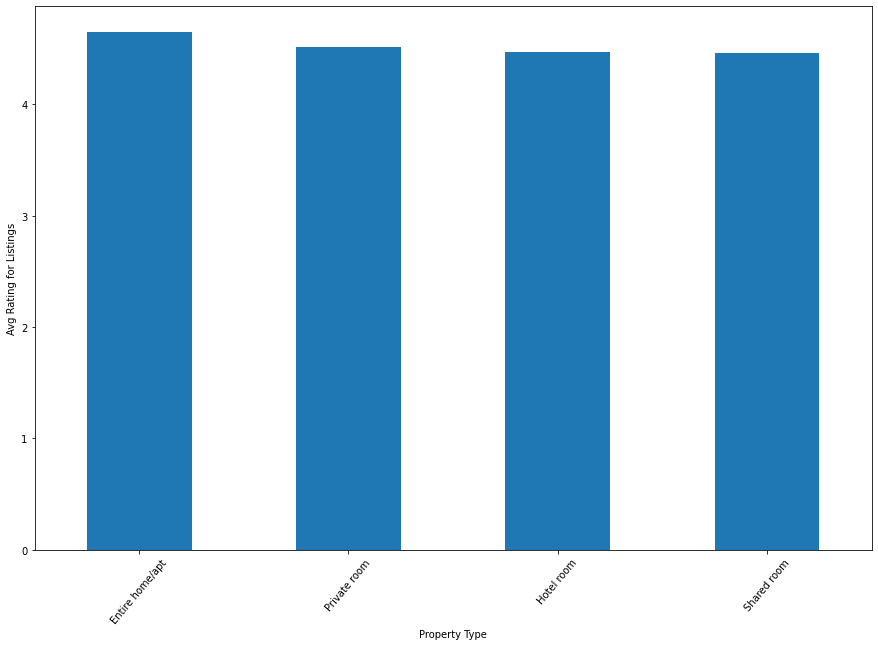

In [32]:
## Avg rating for the property type
plt.figure(figsize=(15,10))
property_type.mean().sort_values(by="review_scores_rating",ascending=False)["review_scores_rating"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Property Type")
plt.ylabel("Avg Rating for Listings")
plt.show()

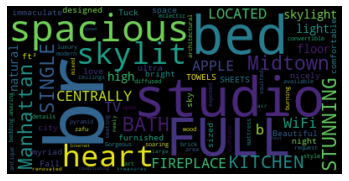

In [33]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

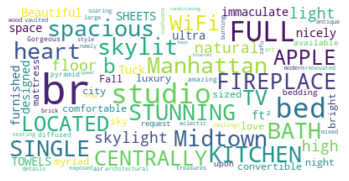

In [34]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
df['description'] = df['description'].astype(str)

In [36]:
df.description.head()

0    Beautiful, spacious skylit studio in the heart...
1    Enjoy 500 s.f. top floor in 1899 brownstone, w...
2    <b>The space</b><br />HELLO EVERYONE AND THANK...
3    We welcome you to stay in our lovely 2 br dupl...
4    Please don’t expect the luxury here just a bas...
Name: description, dtype: object

In [37]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 26450133 words in the combination of all review.


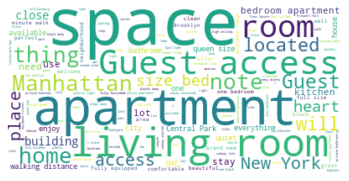

In [38]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["The", "b" ,"r" , "br", "b r"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
df.description.head()

0    Beautiful, spacious skylit studio in the heart...
1    Enjoy 500 s.f. top floor in 1899 brownstone, w...
2    <b>The space</b><br />HELLO EVERYONE AND THANK...
3    We welcome you to stay in our lovely 2 br dupl...
4    Please don’t expect the luxury here just a bas...
Name: description, dtype: object

In [53]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.020000e+13,12/5/21,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,2.020000e+13,12/5/21,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,2.020000e+13,12/5/21,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,2.020000e+13,12/5/21,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,2.020000e+13,12/5/21,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


In [65]:
df[["price","availability_30","availability_60","availability_90","availability_365","number_of_reviews","host_listings_count","review_scores_rating","reviews_per_month","room_type","property_type","has_availability"]].describe()

,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,host_listings_count,review_scores_rating,reviews_per_month
count,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38243.000000,28773.000000,28773.000000
mean,170.858714,6.905531,19.787523,33.946391,134.290984,23.302871,49.020056,4.585140,1.721019
std,305.100271,10.017318,22.038048,34.836649,143.196175,50.415484,312.947661,0.835918,4.399826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,70.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.570000,0.120000
50%,114.000000,1.000000,8.000000,25.000000,73.000000,4.000000,1.000000,4.820000,0.480000
75%,189.000000,11.000000,38.000000,67.000000,302.000000,20.000000,3.000000,5.000000,1.780000
max,10000.000000,30.000000,60.000000,90.000000,365.000000,1009.000000,3750.000000,5.000000,141.000000


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [66]:
time python -c "import spacy; spacy.load('en');"

SyntaxError: invalid syntax (<unknown>, line 1)